In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
def get_data(full_transform):
    full_acc = np.stack([np.array([x[0] for x in y]) for y in full_transform])
    return torch.tensor(full_acc)
    

In [4]:
def get_mean_std(base):
    return base.mean(axis = 0), base.std(axis = 0)/np.sqrt(3)

In [5]:
Baselines10 =[[(91.0, 0.27696144580841064), (91.76, 0.2479711651802063), (92.27, 0.2320448100566864), (92.39, 0.22614636719226838), (92.52, 0.21764296740293504), (92.97, 0.21075557619333268), (93.18, 0.20492599308490753), (92.99, 0.20304295420646667)]
,[(90.89, 0.2836744010448456), (91.97, 0.24282298535108565), (92.17, 0.23281041979789735), (92.32, 0.22474091202020646), (92.71, 0.21067042797803878), (92.76, 0.2089483246207237), (92.94, 0.2010598361492157), (93.13, 0.19920721501111985)]
,[(90.85, 0.2779091536998749), (91.77, 0.2541688472032547), (92.16, 0.2373736396431923), (92.15, 0.22852423489093782), (92.58, 0.21760045289993285), (92.99, 0.20781999826431274), (93.01, 0.20450388491153718), (93.0, 0.19985935986042022)]
]

GP10=[
[(91.13, 0.27088977843523027), (92.34, 0.23216191828250884), (92.85, 0.21919124722480773), (92.62, 0.2183651626110077), (93.07, 0.2046937733888626), (93.06, 0.2022108793258667), (93.38, 0.19776201099157334), (93.33, 0.19489084035158158)],
[(91.18, 0.27343122363090516), (92.16, 0.23147300630807877), (92.58, 0.21892737597227097), (92.86, 0.20643407702445984), (93.04, 0.20103298574686052), (93.27, 0.1976299062371254), (93.31, 0.19221902638673782), (93.44, 0.18909716457128525)],
[(91.29, 0.2692170813679695), (92.22, 0.23660038858652116), (92.41, 0.22242117822170257), (92.6, 0.21433643996715546), (92.85, 0.20622831135988234), (93.03, 0.20034527033567429), (93.36, 0.19544330835342408), (93.36, 0.19320952892303467)]
]
Baselines100 = [[(58.99, 1.5775925040245056), (64.54, 1.2883121609687804), (66.75, 1.1890954971313477), (67.94, 1.1306789755821227), (69.29, 1.0924591660499572), (69.96, 1.0622262895107268), (70.87, 1.034439754486084), (71.18, 1.0146005392074584)],
[(58.13, 1.607319962978363), (64.66, 1.279937219619751), (67.47, 1.1571316361427306), (68.41, 1.1083839893341065), (69.67, 1.0619658529758453), (70.32, 1.0378921687602998), (70.91, 1.0191053211688996), (71.56, 0.9986621141433716)],
[(58.1, 1.6185712099075318), (64.69, 1.2833657264709473), (66.73, 1.203224289417267), (68.14, 1.1359574913978576), (69.0, 1.0972065567970275), (70.4, 1.0640045166015626), (70.78, 1.037442034482956), (71.14, 1.0186416149139403)]]


GP100 = [[(58.16, 1.573310375213623), (65.65, 1.2463364839553832), (67.42, 1.1556974411010743), (69.53, 1.0864354372024536), (70.17, 1.0416716754436492), (70.97, 1.0158433198928833), (71.38, 0.987147057056427), (72.33, 0.970480328798294)]
,[(58.66, 1.5692638993263244), (64.82, 1.259541916847229), (67.44, 1.1708373546600341), (69.12, 1.0936692118644715), (69.95, 1.0505055963993073), (70.47, 1.0174096405506134), (71.41, 0.9932116210460663), (72.07, 0.9748895287513732)]
,[(58.44, 1.5927289128303528), (65.85, 1.2574281811714172), (68.33, 1.1424768805503844), (69.39, 1.08523850440979), (70.17, 1.045788788795471), (71.07, 1.0168291270732879), (71.52, 0.988063371181488), (72.22, 0.9723516523838043)]
]


In [6]:
base10 = get_data(Baselines10)[:,1:]
gp10 = get_data(GP10)[:,1:]
base100 = get_data(Baselines100)[:,1:]
gp100 = get_data(GP100)[:,1:]
proportion = torch.linspace(0.10, 1, 7)


In [7]:
def plot_with_std(A,B, shift, name, save):
    plt.figure(figsize = (4,3.5))
    A_mean = A.mean(axis = 0)
    B_mean = B.mean(axis = 0)
    A_std = A.std(axis = 0)/np.sqrt(len(A))
    B_std = B.std(axis = 0)/np.sqrt(len(B))
    
    col = '#1f77b4'
    col2 = '#ff7f0e'

    plt.plot(shift, A_mean, marker = 'o')
    plt.fill_between(shift, A_mean -A_std, A_mean + A_std, alpha = 0.15, color = col)
    plt.plot(shift, B_mean, marker = 'x')
    plt.fill_between(shift, B_mean -B_std, B_mean + B_std, alpha = 0.15, color = col2)
    plt.legend(['No gradient\npenalty', 'Gradient penalty'], fontsize=12, frameon=False)
    plt.xlabel(name)
    plt.ylabel('Test accuracy')
    destination = os.path.join('./figures', save)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")

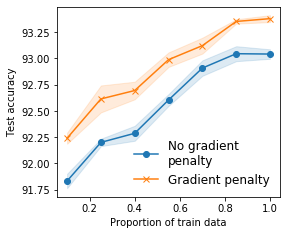

In [8]:
plot_with_std(base10, gp10, proportion, 'Proportion of train data', 'cifar10_semisup')

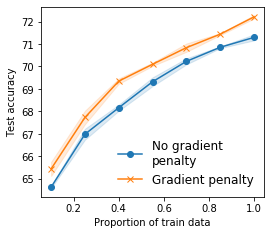

In [9]:
plot_with_std(base100, gp100, proportion, 'Proportion of train data', 'cifar100_semisup')